Phase 1 - Data Collection and Exploratory Data Analysis (EDA)


In [2]:
import pandas as pd

# Load dataset
df = pd.read_csv("Employee.csv")

# View initial rows
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Drop duplicates
df.drop_duplicates(inplace=True)

# Optional: Fill or drop missing values
df.fillna(method='ffill', inplace=True)

# Clean inconsistent data (e.g., standardize department names)
df['Department'] = df['Department'].str.strip().str.title()


  Employee ID           Name  Age Department  Salary  Years at Company  \
0        E001     John Smith   34      Sales   72000                 5   
1        E002  Alice Johnson   28         HR   65000                 3   
2        E003   Robert Brown   45         IT   95000                10   
3        E004     Mary Davis   30    Finance   70000                 4   
4        E005   James Wilson   38      Sales   78000                 7   

   Performance Score Attrition  
0                3.5        No  
1                4.2        No  
2                4.7        No  
3                3.8       Yes  
4                3.1       Yes  
Employee ID          0
Name                 0
Age                  0
Department           0
Salary               0
Years at Company     0
Performance Score    0
Attrition            0
dtype: int64


C:\Users\Hp\AppData\Local\Temp\ipykernel_17984\689925215.py:16: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


Exploratory Data Analysis (EDA)


             Age        Salary  Years at Company  Performance Score
count  20.000000     20.000000            20.000          20.000000
mean   35.750000  74550.000000             6.100           3.855000
std     7.151555  11394.712532             3.712           0.560521
min    26.000000  60000.000000             1.000           2.900000
25%    29.750000  66750.000000             3.750           3.450000
50%    34.500000  71500.000000             5.000           3.850000
75%    40.250000  81250.000000             8.250           4.250000
max    50.000000  98000.000000            15.000           4.800000


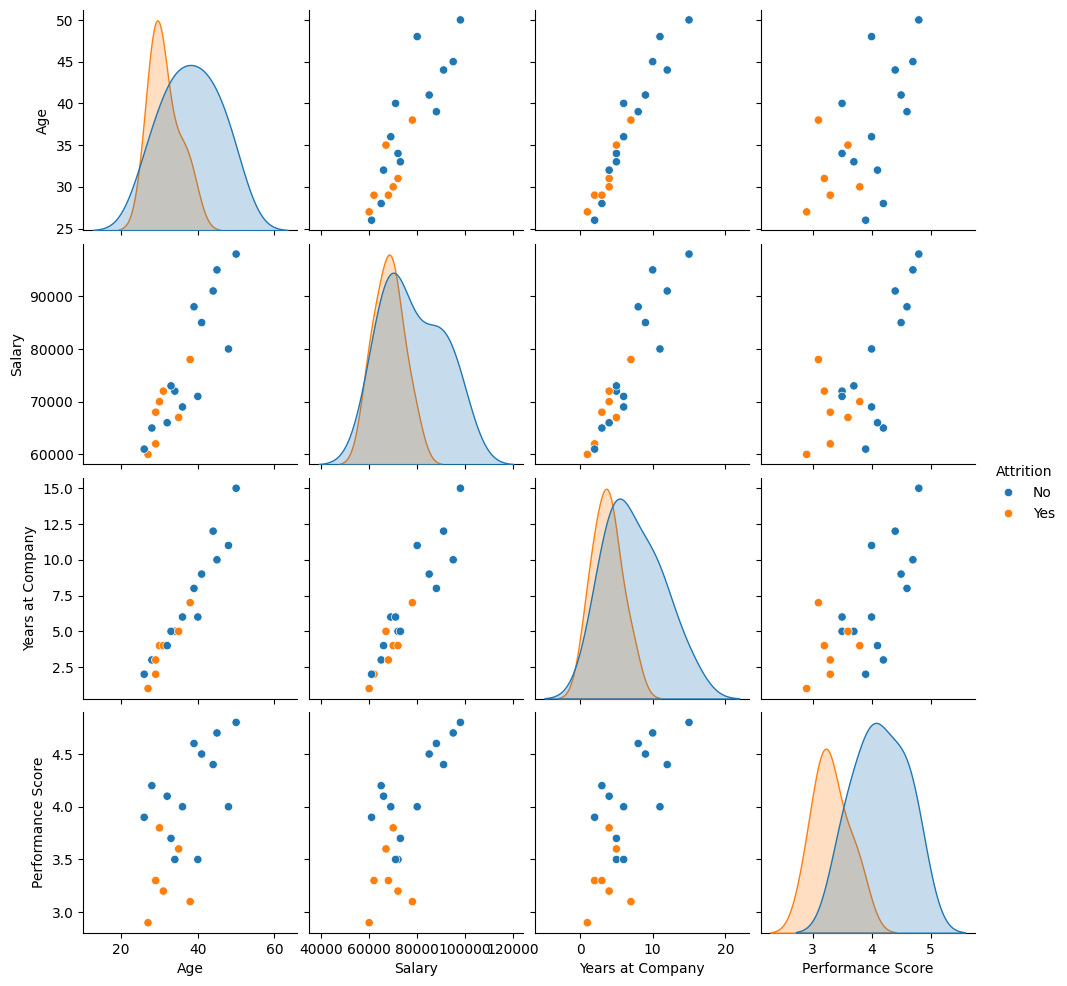

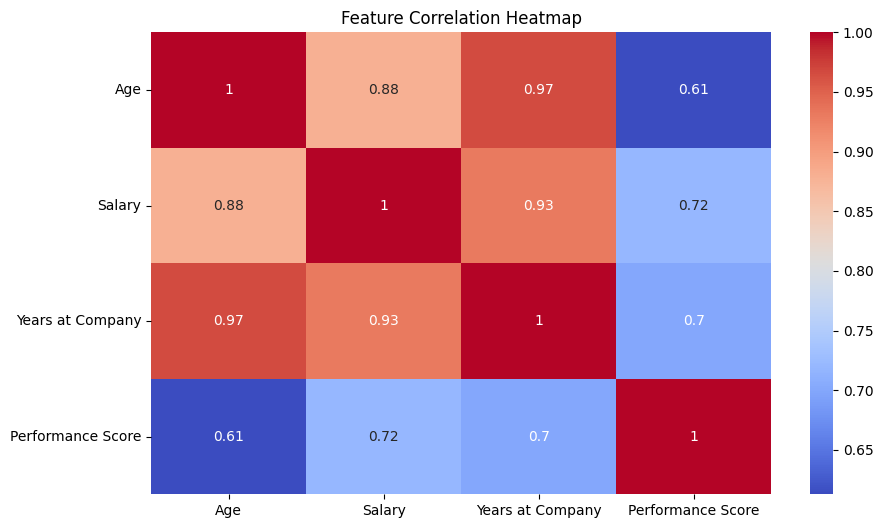

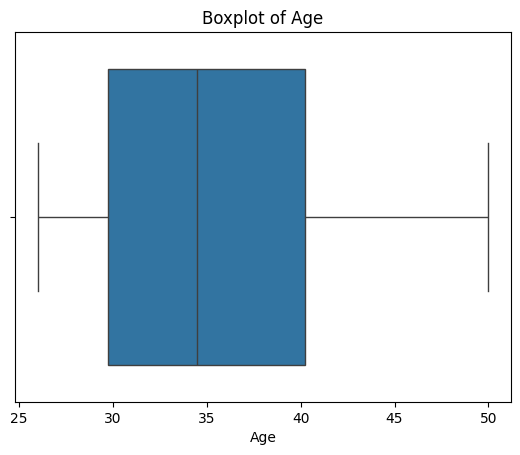

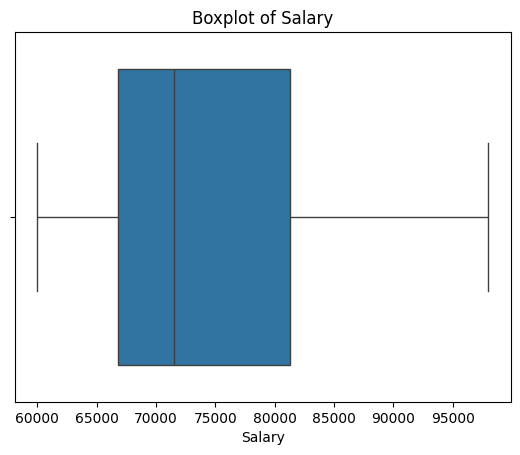

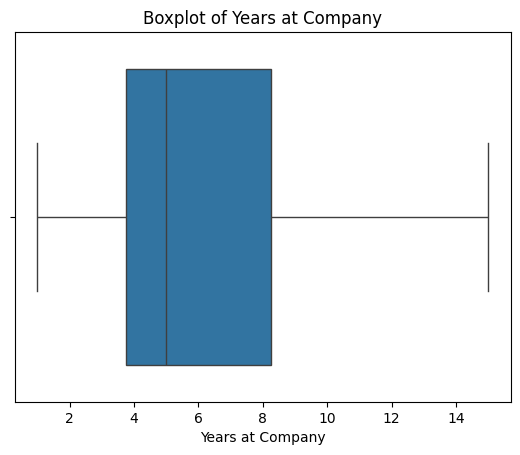

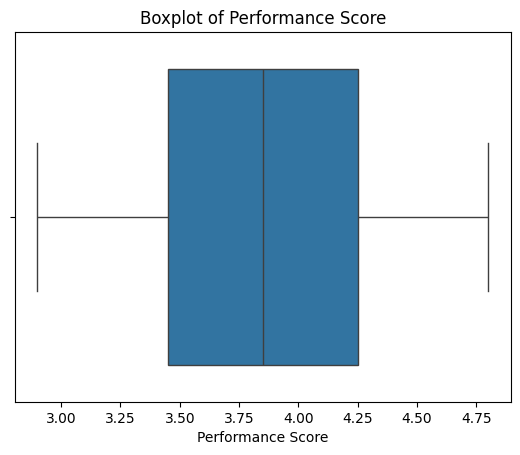

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Descriptive statistics
print(df.describe())

# Pairplot
sns.pairplot(df, hue='Attrition')
plt.show()

# Heatmap of correlation
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# Boxplots for outlier detection
numeric_features = ['Age', 'Salary', 'Years at Company', 'Performance Score']
for feature in numeric_features:
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()


Probability and Statistical Analysis


In [4]:
# Probability of attrition by department
attrition_prob = df[df['Attrition'] == 'Yes']['Department'].value_counts() / df['Department'].value_counts()
print(attrition_prob)

# Bayes Theorem - P(Attrition | Low Performance)
prob_low_perf = (df['Performance Score'] < df['Performance Score'].median())
p_attrition = df['Attrition'].value_counts(normalize=True)['Yes']
p_low_perf = prob_low_perf.mean()
p_low_perf_given_attrition = df[(df['Attrition'] == 'Yes') & (prob_low_perf)]['Attrition'].count() / df[df['Attrition'] == 'Yes'].shape[0]

# Bayes' result
bayes_result = (p_low_perf_given_attrition * p_attrition) / p_low_perf
print("P(Attrition | Low Performance) using Bayes' Theorem:", bayes_result)

# Hypothesis testing
import scipy.stats as stats
groups = df.groupby("Department")["Performance Score"].apply(list)
stat, p_value = stats.f_oneway(*groups)
print("ANOVA p-value (Performance by Department):", p_value)


Department
Finance      0.75
Hr            NaN
It            NaN
Marketing    0.75
Sales        0.25
Name: count, dtype: float64
P(Attrition | Low Performance) using Bayes' Theorem: 0.7
ANOVA p-value (Performance by Department): 0.006300139828365306


Phase 2 - Predictive Modeling


 Feature Engineering and Encoding

In [5]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Scale numeric columns
scaler = MinMaxScaler()
df[['Salary', 'Performance Score']] = scaler.fit_transform(df[['Salary', 'Performance Score']])

# Encode categorical variables
label_enc = LabelEncoder()
df['Attrition'] = label_enc.fit_transform(df['Attrition'])  # Yes = 1, No = 0
df['Department'] = label_enc.fit_transform(df['Department'])


 Employee Attrition Prediction Model


              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.50      0.67         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



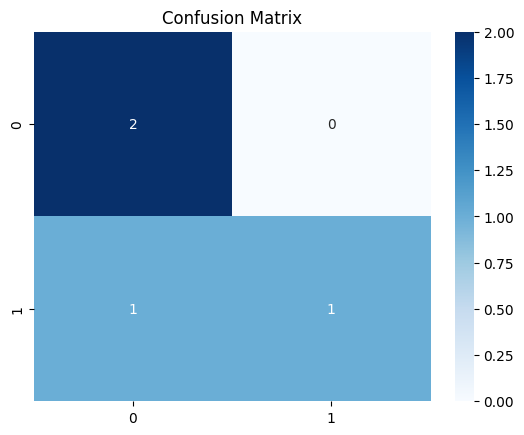

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Define features and target
X = df.drop(['Attrition', 'Employee ID', 'Name'], axis=1)
y = df['Attrition']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Evaluation
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


 Employee Performance Prediction Model


R^2 Score: -0.10048542702796204
MSE: 0.034294905966937864


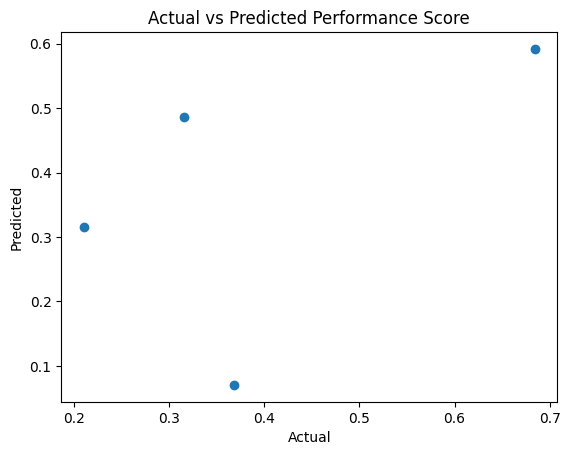

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target
X = df.drop(['Performance Score', 'Employee ID', 'Name'], axis=1)
y = df['Performance Score']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear regression
reg = LinearRegression()
reg.fit(X_train, y_train)

# Evaluation
y_pred = reg.predict(X_test)
print("R^2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

# Plot
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Performance Score")
plt.show()


Phase 3 - Deep Learning Models


 Deep Learning for Employee Performance Prediction

In [8]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Define model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train
model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2)

# Evaluate
loss, mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {mae}")


c:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.4615 - mae: 0.5452 - val_loss: 0.1615 - val_mae: 0.3065
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step - loss: 0.3464 - mae: 0.5132 - val_loss: 0.2098 - val_mae: 0.3450
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step - loss: 0.4177 - mae: 0.5669 - val_loss: 0.0853 - val_mae: 0.2721
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step - loss: 0.1960 - mae: 0.4247 - val_loss: 0.1610 - val_mae: 0.3481
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step - loss: 0.1783 - mae: 0.3012 - val_loss: 0.3093 - val_mae: 0.5043
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step - loss: 0.2849 - mae: 0.3941 - val_loss: 0.2769 - val_mae: 0.4761
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step - loss: 0.2580 - mae: 0.3723 - val_loss: 0.1379 - val_mae: 0.3200
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step - loss: 0.1518 - mae: 0.2771 - val_loss: 0.0582 - val_mae: 0.2118
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step - loss: 0.1210 - mae: 0.3

Employee Attrition Analysis with Deep Learning


In [9]:
# Model
model_class = Sequential([
    Dense(64, activation='relu', input_shape=(X.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_class.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

# Train
model_class.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2)

# Evaluate
results = model_class.evaluate(X_test, y_test)
print(f"Test Accuracy: {results[1]}")


c:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.0833 - loss: 3.7376 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 2.9701 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step - accuracy: 0.0833 - loss: 3.4417 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 2.7162 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step - accuracy: 0.0833 - loss: 3.1495 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 2.4664 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 0.0833 - loss: 2.8611 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 2.2214 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.0833 - loss: 2.5784 - precis

Phase 4 - Reporting and Insights

Insights and Recommendations

Example insights:

High attrition probability in departments with lower average performance.

Employees with lower salaries or fewer years at the company more likely to leave.

Performance is positively correlated with salary and tenure.

Recommendations:

Focus on employee engagement in high-risk departments.

Offer training and development programs to boost performance.

Consider salary adjustments for high performers to retain talent.

 Visualizations & Reporting


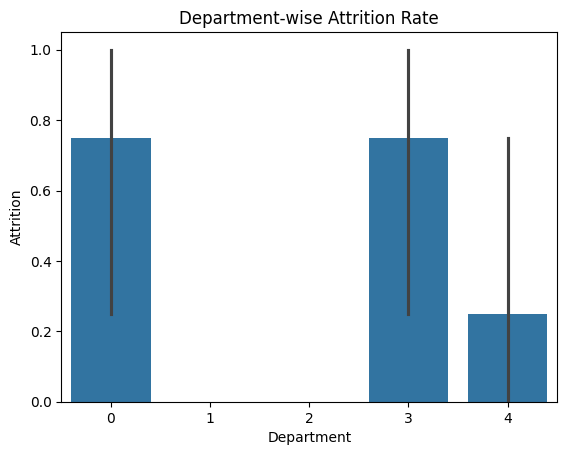

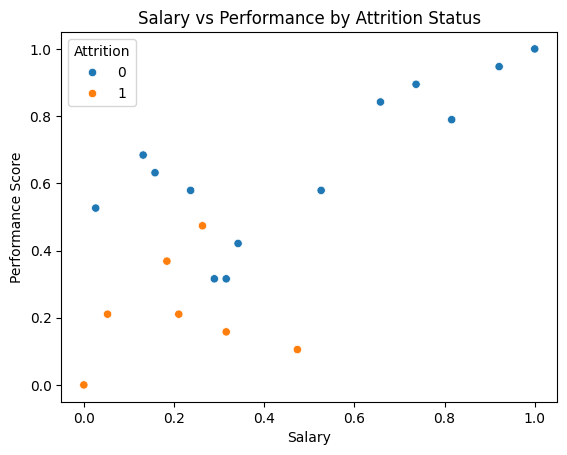

In [10]:
# Bar Chart - Department-wise attrition
sns.barplot(data=df, x='Department', y='Attrition')
plt.title('Department-wise Attrition Rate')
plt.show()

# Line Plot - Performance trend over years (if applicable)
# Assuming you have 'Year' or similar
# sns.lineplot(data=df, x='Years at Company', y='Performance Score')

# Scatter Plot - Salary vs Performance
sns.scatterplot(data=df, x='Salary', y='Performance Score', hue='Attrition')
plt.title('Salary vs Performance by Attrition Status')
plt.show()
